# Autoregressive Integrated Moving Average (ARIMA)

In [2]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error



In [3]:
df = read_csv("day.csv", header=0, parse_dates=[0], index_col=0, squeeze=True)
series.head()

NameError: name 'series' is not defined

In [4]:
#Check the format of the date and then convert the Date column to a date object if necessary

df.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt           float64
dtype: object

In [8]:
from pandas import to_datetime
df.dteday=to_datetime(df.dteday)
df.cnt = df.cnt.astype(str)

df.dtypes

dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                   object
dtype: object

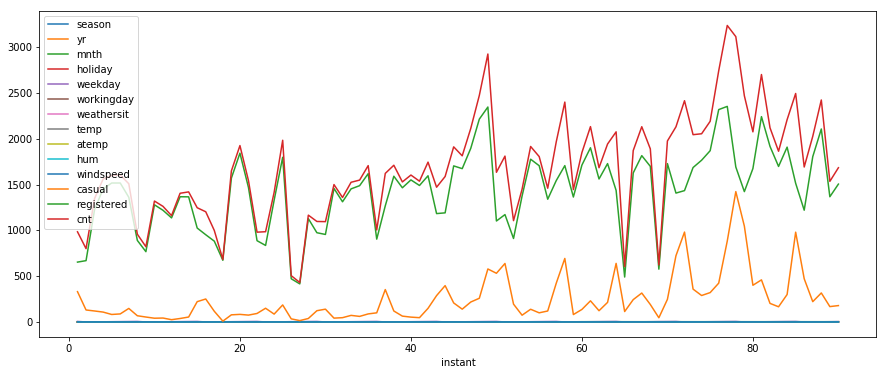

In [5]:
df.plot(figsize=(15,6))
pyplot.show()

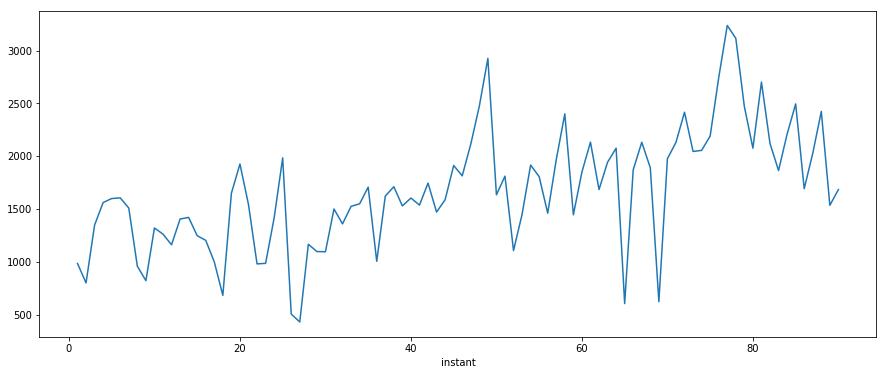

In [6]:
df['cnt'].plot(figsize=(15,6))
pyplot.show()

TypeError: can only concatenate str (not "int") to str

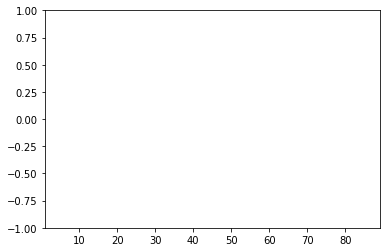

In [7]:
autocorrelation_plot(df[1:100])
pyplot.show()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(df)
pyplot.show()

In [52]:
df.tail()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,DateTime
instant,,,,,,,,,,,,,,,,
86,2011-03-27,2,0,3,0,0,0,2,0.253043,0.250339,0.493913,0.184300,472,1221,1693.0,2011-03-27
87,2011-03-28,2,0,3,0,1,1,1,0.264348,0.257574,0.302174,0.212204,222,1806,2028.0,2011-03-28
88,2011-03-29,2,0,3,0,2,1,1,0.302500,0.292908,0.314167,0.226996,317,2108,2425.0,2011-03-29
89,2011-03-30,2,0,3,0,3,1,2,0.300000,0.297350,0.646667,0.172888,168,1368,1536.0,2011-03-30
90,2011-03-31,2,0,3,0,4,1,3,0.268333,0.257575,0.918333,0.217646,179,1506,1685.0,2011-03-31


In [67]:
#Check the format of the date and then convert the Date column to a date object if necessary
df.dteday = pd.to_datetime(df.dteday)
#df.cnt = df.cnt.astype(str)
df.dtypes

dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                  float64
DateTime      datetime64[ns]
dtype: object

In [68]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,DateTime
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985.0,2011-01-01
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801.0,2011-01-02
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349.0,2011-01-03
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562.0,2011-01-04
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600.0,2011-01-05


In [70]:
cnt=(df['cnt'])
cnt.head()

instant
1     985.0
2     801.0
3    1349.0
4    1562.0
5    1600.0
Name: cnt, dtype: float64

Let's perform a quick plot to understand/visualise what the data looks like.

Text(0,0.5,'Bicycle Checkouts Counts')

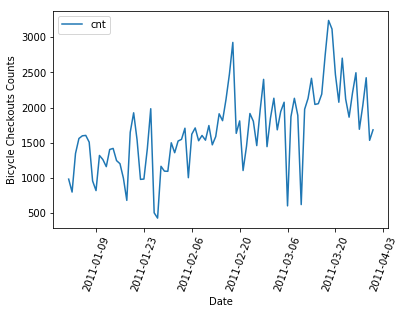

In [71]:
pyplot.plot(df['dteday'], df['cnt'])
pyplot.xticks(rotation=70)
pyplot.legend()
pyplot.xlabel('Date')
pyplot.ylabel('Bicycle Checkouts Counts')

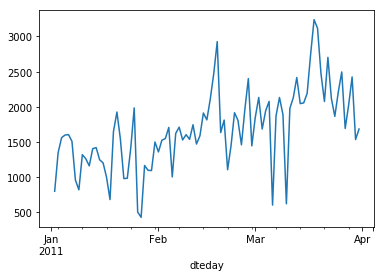

In [72]:
from pandas import Series
data_clean = df
data_clean['dteday'] = pd.to_datetime(df['dteday'].apply(str)) 



# The code will create the dataset as a Pandas Series.
ts = Series(df['cnt'].values, index=df.dteday)
plt = ts[1:1000].plot()  #
pyplot.show(plt)

We can see a general increase in the dataset which we can refer to as a trend.  

This suggests that the time series is not stationary and will require differencing to make it stationary.  
This means we are going to try to take out the trend component: d = 1

## p, d, q (arima parameters)

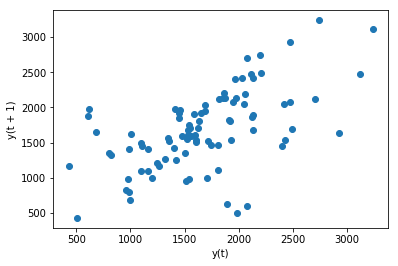

In [73]:
#Do a quick check to see if there is autocorrelation in the data.

from pandas.plotting import lag_plot
lag_plot(ts)
pyplot.show()

There is a correlation observed, due to clustering of data along the a positive diagnonal line. The corelation might not be strong as there are many data points that are scattered.

In [107]:
# autocorrelate 

series=read_csv('day.csv', index_col=0, parse_dates=[0],  header=0,  squeeze=True)

#series.dtypes('float64')
series.dtypes
#series=series.astype(str)


dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt           float64
dtype: object

In [109]:
#f.dteday = pd.to_datetime(df.dteday)
#df.cnt= df.cnt.astype(int)
#df.dtypes

In [96]:
series.head(3)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985.0
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801.0
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349.0


TypeError: can only concatenate str (not "int") to str

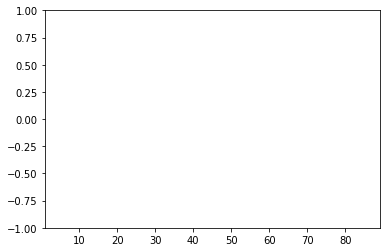

In [99]:
autocorrelation_plot(series[1:4000])
pyplot.show()

TypeError: float() argument must be a string or a number, not 'Timestamp'

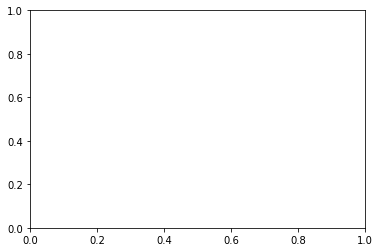

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(df)
pyplot.show()

Get your pdq values to experiment with and fit the model

In [ ]:
# fit the model
#model = ARIMA(series, order=(5,1,3)) # first model still showed some trend so we try (5,2,3)
#model = ARIMA(series, order=(5,2,3)) # gave convergence warning
#model = ARIMA(series, order=(5,2,2)) # gave an error
model = ARIMA(series, order=(5,1,2))   
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())


## Rolling Forecast
We now try to use the model to predict future responses.  

In [ ]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
